In [1]:
!pip install MulensModel
!pip install mechanize
!pip install emcee
!pip install corner

In [2]:
import numpy as np
import pandas as pd

import mechanize
import requests
import urllib, base64
import io
import os

import matplotlib.pyplot as plt

import scipy.optimize as op
import emcee


import MulensModel as mm
import corner
import matplotlib

In [13]:
gaiaName = "Gaia19dke"
coords="19:25:58.68 28:24:24.70"

input_G = "Data/G_Gaia.dat"
input_B = "Data/B(GaiaSP).dat"
input_g = "Data/g(GaiaSP).dat"
input_i = "Data/i(GaiaSP)_7.dat"
input_I = "Data/I(GaiaSP).dat"
input_r = "Data/r(GaiaSP)_6.dat"
input_R = "Data/R(GaiaSP).dat"
input_V = "Data/V(GaiaSP).dat"
input_g2 = "Data/Gaia19dke_ZTF_g.dat"
input_i2 = "Data/Gaia19dke_ZTF_i.dat"
input_r2 = "Data/Gaia19dke_ZTF_r.dat"

my_data = np.genfromtxt(input_G, delimiter=' ')
if my_data.ndim == 1:
  my_data = my_data.reshape(1, -1)
G_Time = my_data[:,0] - 2450000 
G_Mags = my_data[:,1]
G_Errs = (my_data[:,2])

my_data = np.genfromtxt(input_B, delimiter=' ')
if my_data.ndim == 1:
  my_data = my_data.reshape(1, -1)
B_Time = my_data[:,0] - 2450000 
B_Mags = my_data[:,1]
B_Errs = (my_data[:,2])

my_data = np.genfromtxt(input_g, delimiter=' ')
if my_data.ndim == 1:
  my_data = my_data.reshape(1, -1)
g_Time = my_data[:,0] - 2450000 
g_Mags = my_data[:,1]
g_Errs = (my_data[:,2])

my_data = np.genfromtxt(input_i, delimiter=' ')
if my_data.ndim == 1:
  my_data = my_data.reshape(1, -1)
i_Time = my_data[:,0] - 2450000 
i_Mags = my_data[:,1]
i_Errs = (my_data[:,2])

my_data = np.genfromtxt(input_I, delimiter=' ')
if my_data.ndim == 1:
  my_data = my_data.reshape(1, -1)
I_Time = my_data[:,0] - 2450000 
I_Mags = my_data[:,1]
I_Errs = (my_data[:,2])

my_data = np.genfromtxt(input_r, delimiter=' ')
if my_data.ndim == 1:
  my_data = my_data.reshape(1, -1)
r_Time = my_data[:,0] - 2450000 
r_Mags = my_data[:,1]
r_Errs = (my_data[:,2])

my_data = np.genfromtxt(input_R, delimiter=' ')
if my_data.ndim == 1:
  my_data = my_data.reshape(1, -1)
R_Time = my_data[:,0] - 2450000 
R_Mags = my_data[:,1]
R_Errs = (my_data[:,2])

my_data = np.genfromtxt(input_V, delimiter=' ')
if my_data.ndim == 1:
  my_data = my_data.reshape(1, -1)
V_Time = my_data[:,0] - 2450000 
V_Mags = my_data[:,1]
V_Errs = (my_data[:,2])

my_data = np.genfromtxt(input_g2, delimiter=' ')
if my_data.ndim == 1:
  my_data = my_data.reshape(1, -1)
g2_Time = my_data[:,0] - 2450000 
g2_Mags = my_data[:,1]
g2_Errs = (my_data[:,2])

my_data = np.genfromtxt(input_i2, delimiter=' ')
if my_data.ndim == 1:
  my_data = my_data.reshape(1, -1)
i2_Time = my_data[:,0] - 2450000 
i2_Mags = my_data[:,1]
i2_Errs = (my_data[:,2])

my_data = np.genfromtxt(input_r2, delimiter=' ')
if my_data.ndim == 1:
  my_data = my_data.reshape(1, -1)
r2_Time = my_data[:,0] - 2450000 
r2_Mags = my_data[:,1]
r2_Errs = (my_data[:,2])

In [14]:
alpha = 0.3

G_Data = mm.MulensData(
	data_list = (G_Time, G_Mags, G_Errs),
	phot_fmt = 'mag',
	add_2450000 = True,
	plot_properties={'color': 'blue', 'label': 'G_Gaia', 'marker' : 'o', 'alpha' : alpha})

B_Data = mm.MulensData(
	data_list = (B_Time, B_Mags, B_Errs),
	phot_fmt = 'mag',
	add_2450000 = True,
	plot_properties={'color': 'steelblue', 'label': 'B(GaiaSP)', 'marker' : 'o', 'alpha' : alpha})

g_Data = mm.MulensData(
	data_list = (g_Time, g_Mags, g_Errs),
	phot_fmt = 'mag',
	add_2450000 = True,
	plot_properties={'color': 'green', 'label': 'g(GaiaSP)', 'marker' : 'o', 'alpha' : alpha})

r_Data = mm.MulensData(
	data_list = (r_Time, r_Mags, r_Errs),
	phot_fmt = 'mag',
	add_2450000 = True,
	plot_properties={'color': 'red', 'label': 'r(GaiaSP)', 'marker' : 'o', 'alpha' : alpha})

R_Data = mm.MulensData(
	data_list = (R_Time, R_Mags, R_Errs),
	phot_fmt = 'mag',
	add_2450000 = True,
	plot_properties={'color': 'orange', 'label': 'R(GaiaSP)', 'marker' : 'o', 'alpha' : alpha})

i_Data = mm.MulensData(
	data_list = (i_Time, i_Mags, i_Errs),
	phot_fmt = 'mag',
	add_2450000 = True,
	plot_properties={'color': 'purple', 'label': 'i(GaiaSP)', 'marker' : 'o', 'alpha' : alpha})

I_Data = mm.MulensData(
	data_list = (I_Time, I_Mags, I_Errs),
	phot_fmt = 'mag',
	add_2450000 = True,
	plot_properties={'color': 'pink', 'label': 'I(GaiaSP)', 'marker' : 'o', 'alpha' : alpha})

V_Data = mm.MulensData(
	data_list = (V_Time, V_Mags, V_Errs),
	phot_fmt = 'mag',
	add_2450000 = True,
	plot_properties={'color': 'darkgreen', 'label': 'V(GaiaSP)', 'marker' : 'o', 'alpha' : alpha})

g2_Data = mm.MulensData(
	data_list = (g2_Time, g2_Mags, g2_Errs),
	phot_fmt = 'mag',
	add_2450000 = True,
	plot_properties={'color': 'violet', 'label': 'g(ZTF)', 'marker' : 'o', 'alpha' : alpha})

i2_Data = mm.MulensData(
	data_list = (i2_Time, i2_Mags, i2_Errs),
	phot_fmt = 'mag',
	add_2450000 = True,
	plot_properties={'color': 'yellow', 'label': 'i(ZTF)', 'marker' : 'o', 'alpha' : alpha})

r2_Data = mm.MulensData(
	data_list = (r2_Time, r2_Mags, r2_Errs),
	phot_fmt = 'mag',
	add_2450000 = True,
	plot_properties={'color': 'grey', 'label': 'r(ZTF)', 'marker' : 'o', 'alpha' : alpha})

In [15]:
params = dict()
params['t_0_par'] = 2459068
params['t_0'] = 2459062.2254 # full JD has to go here!!!
params['u_0'] = -0.6093
params['t_E'] = 161.2716
params['pi_E_N'] = -0.0908
params['pi_E_E'] = -0.1948


my_model_parallax = mm.Model(params, coords = coords)
my_event_parallax = mm.Event(datasets=(G_Data, g_Data, B_Data, V_Data, i_Data, I_Data, r_Data, R_Data, g2_Data, r2_Data), model=my_model_parallax) 


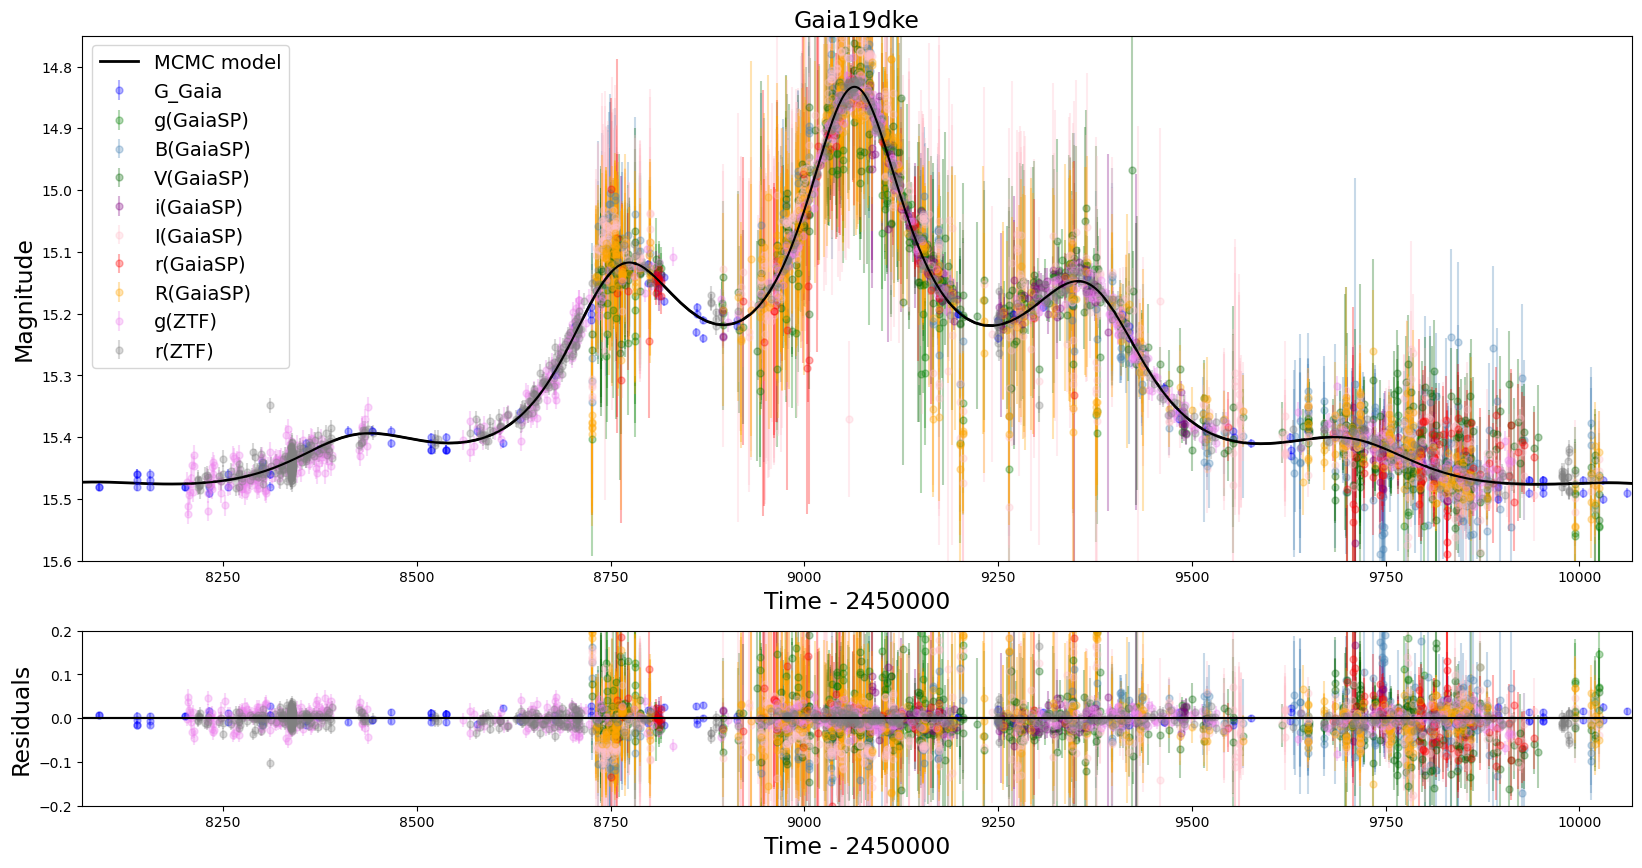

3621.640566603799

In [16]:
plt.figure(figsize=(20, 10))
grid = matplotlib.gridspec.GridSpec(2, 1, height_ratios=[3, 1])
axes = plt.subplot(grid[0])
my_event_parallax.plot_data(subtract_2450000=True)

my_event_parallax.plot_model(color='black', t_start=2458000., t_stop=2469500., lw=2, subtract_2450000=True, label="MCMC model")
plt.title(("%s")%(gaiaName), fontsize=17)

(source_flux2, blend_flux2) = my_event_parallax.get_ref_fluxes()
xmodel = np.linspace(8200+2450000, 10100+2450000, num=1000)
ymodel2 = my_model_parallax.get_lc(xmodel, source_flux=source_flux2, blend_flux=blend_flux2)
plt.plot(xmodel-2450000, ymodel2,color='black', zorder=2137)
xmin = params['t_0_par'] - 1000 - 2450000
xmax = params['t_0_par'] + 1000 - 2450000
plt.xlim(xmin, xmax)
plt.ylim(15.6, 14.75)

plt.xlabel('Time - 2450000', fontsize=17)
plt.ylabel('Magnitude', fontsize=17)
plt.legend(loc='best', fontsize=14)

axes = plt.subplot(grid[1])
my_event_parallax.plot_residuals(subtract_2450000=True)
plt.axhline(y = 0, color = 'black', linestyle = '-', zorder=2137)
plt.xlim(xmin, xmax)
plt.ylim(-0.2, 0.2)
plt.xlabel('Time - 2450000', fontsize=17)
plt.ylabel('Residuals', fontsize=17)
plt.savefig("Images/fup_lc.pdf")
plt.show()

my_event_parallax.get_chi2()

In [17]:
params = dict()
params['t_0_par'] = 2459068
params['t_0'] = 2459065.3857 # full JD has to go here!!!
params['u_0'] = -0.6115
params['t_E'] = 159.4761
params['pi_E_N'] = -0.0936
params['pi_E_E'] = -0.1972


my_model_gaia = mm.Model(params, coords = coords)
my_event_gaia = mm.Event(datasets=(G_Data), model=my_model_gaia) 

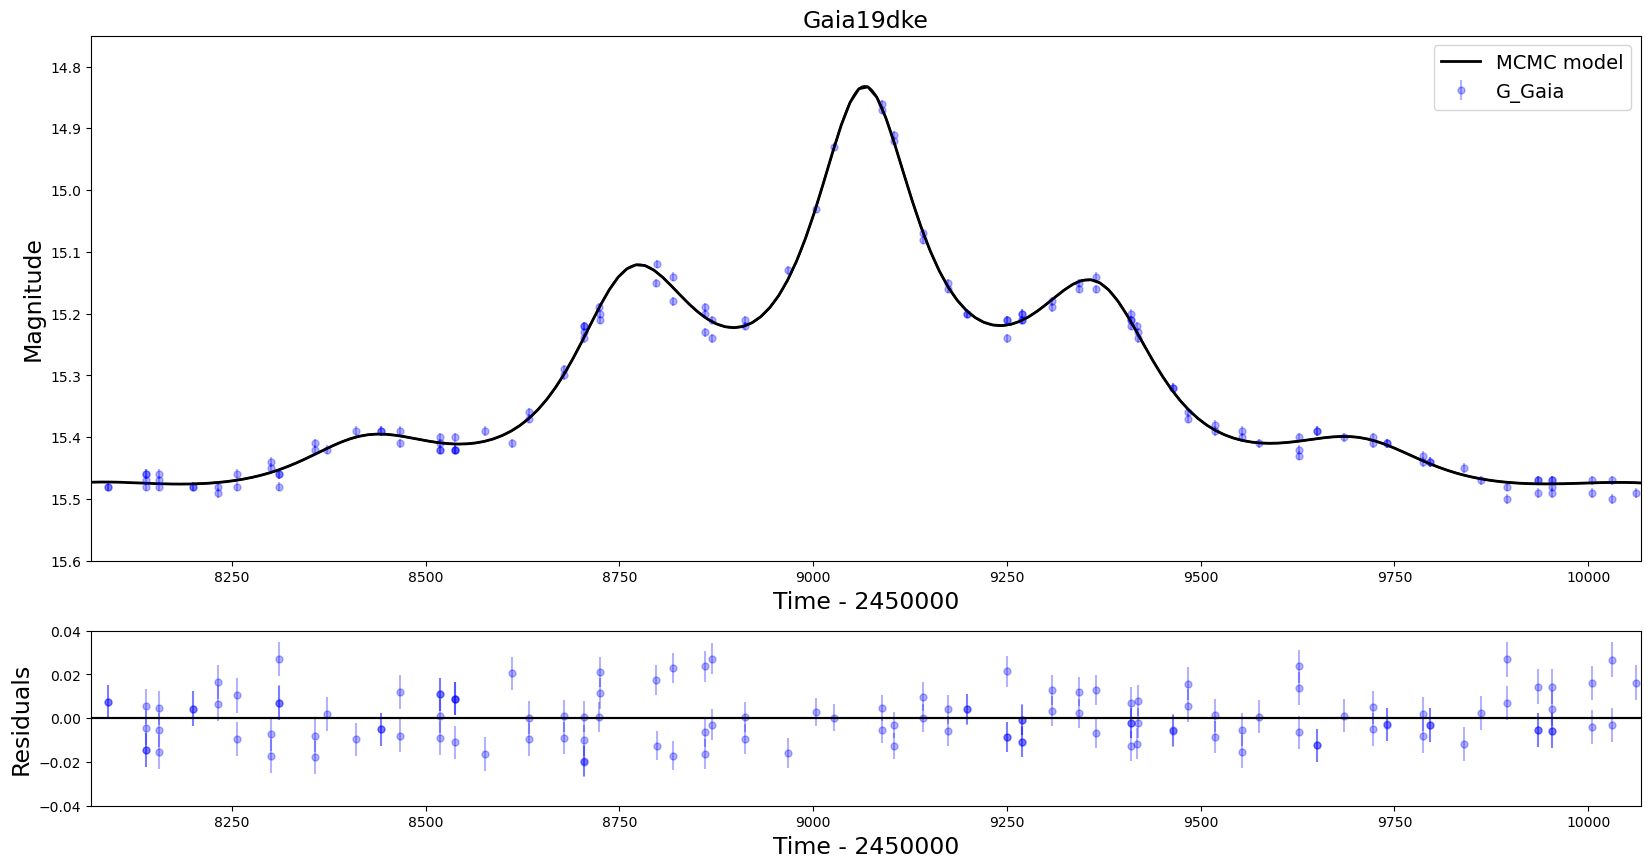

556.6580264963158

In [18]:
plt.figure(figsize=(20, 10))
grid = matplotlib.gridspec.GridSpec(2, 1, height_ratios=[3, 1])
axes = plt.subplot(grid[0])
my_event_gaia.plot_data(subtract_2450000=True)

my_event_gaia.plot_model(color='black', t_start=2458000., t_stop=2469500., lw=2, subtract_2450000=True, label="MCMC model")
plt.title(("%s")%(gaiaName), fontsize=17)

(source_flux2, blend_flux2) = my_event_gaia.get_ref_fluxes()
xmodel = np.linspace(8200+2450000, 10100+2450000, num=1000)
ymodel2=my_model_gaia.get_lc(xmodel, source_flux=source_flux2, blend_flux=blend_flux2)
plt.plot(xmodel-2450000, ymodel2,color='black', zorder=2137)
xmin = params['t_0_par'] - 1000 - 2450000
xmax = params['t_0_par'] + 1000 - 2450000
plt.xlim(xmin, xmax)
plt.ylim(15.6, 14.75)


plt.xlabel('Time - 2450000', fontsize=17)
plt.ylabel('Magnitude', fontsize=17)
plt.legend(loc='best', fontsize=14)

axes = plt.subplot(grid[1])
my_event_gaia.plot_residuals(subtract_2450000=True)
plt.axhline(y = 0, color = 'black', linestyle = '-', zorder=2137)
plt.xlim(xmin, xmax)
plt.ylim(-0.04, 0.04)
plt.xlabel('Time - 2450000', fontsize=17)
plt.ylabel('Residuals', fontsize=17)
plt.savefig("Images/gaia_lc.pdf")
plt.show()

my_event_gaia.get_chi2()